<p style="font-family:newtimeroman;font-size:400%;text-align:center;color:white;">Amazon Sales Dataset</p>



<p style="font-family:Arial; font-size:30px; color:white; background-color:black; padding:10px; border-radius:10px;">
                                    Detecting Outliers
</p>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
%matplotlib inline


In [16]:
df = pd.read_csv(r"C:\Users\Basmala\OneDrive\Desktop\Amason\Data\cleaned_data.csv")
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",Manav,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",ArdKn,"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",Kunal,"R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",Omkar dhale,"R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",rahuls6099,"R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


### Step 1: Detecting Outliers Using Boxplot
- We will use Boxplot to identify the outliers in key columns such as: actual price , discount percentage , rating , and rating count .

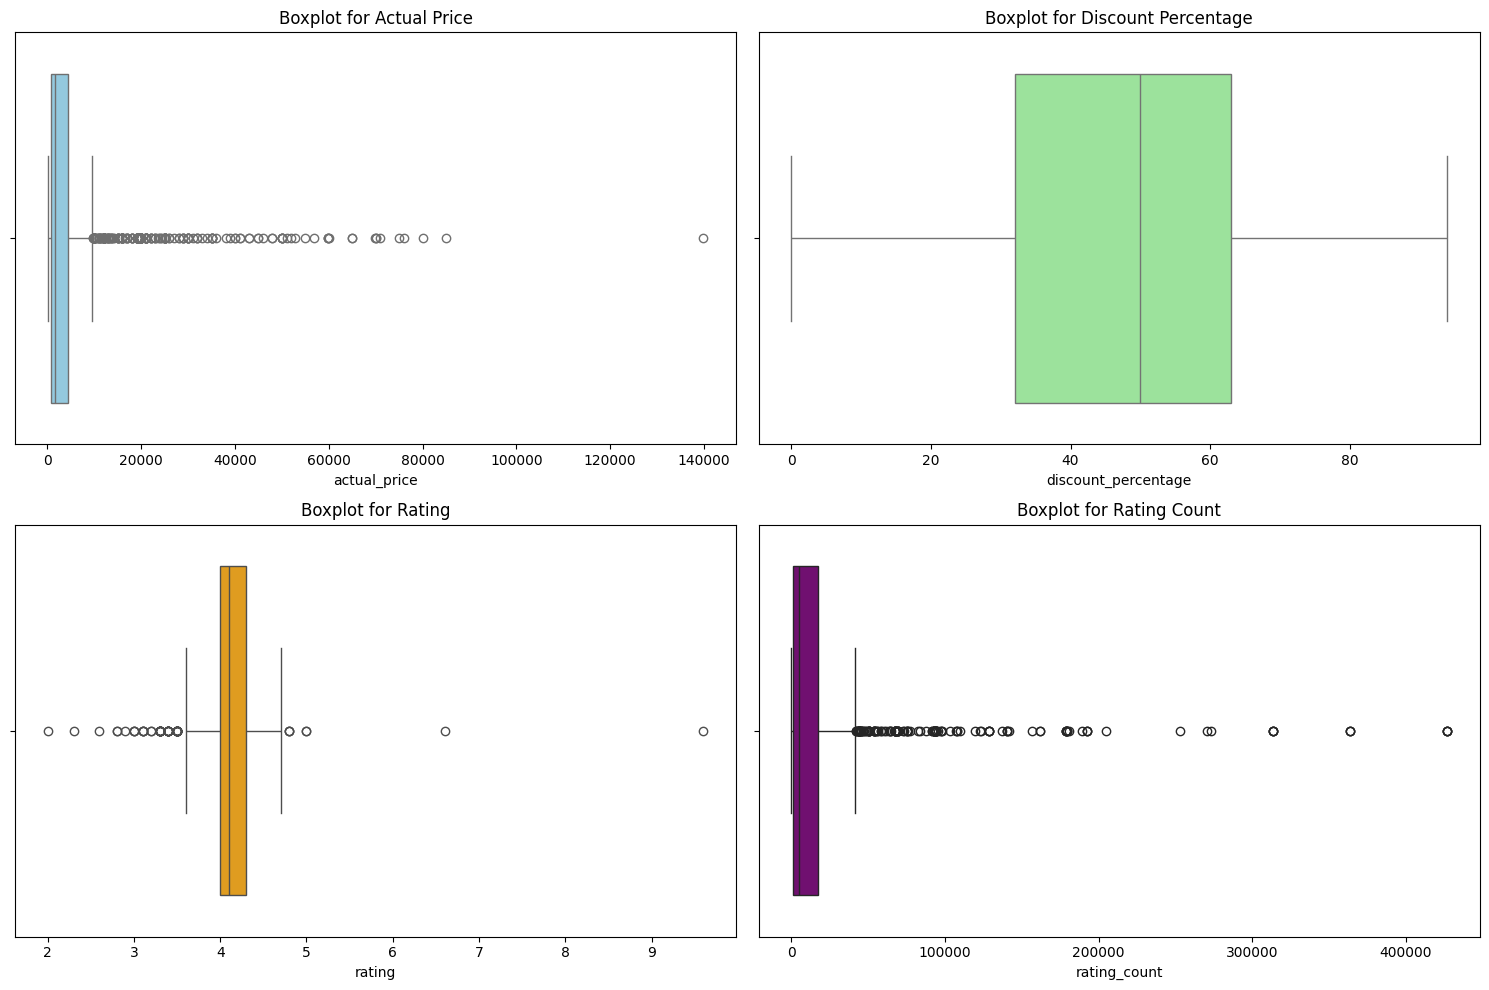

In [17]:
# Plotting boxplots to detect outliers in different columns
plt.figure(figsize=(15,10))

# Actual Price Outliers
plt.subplot(2, 2, 1)
sns.boxplot(x=df['actual_price'], color='skyblue')
plt.title('Boxplot for Actual Price')

# Discount Percentage Outliers
plt.subplot(2, 2, 2)
sns.boxplot(x=df['discount_percentage'], color='lightgreen')
plt.title('Boxplot for Discount Percentage')

# Rating Outliers
plt.subplot(2, 2, 3)
sns.boxplot(x=df['rating'], color='orange')
plt.title('Boxplot for Rating')

# Rating Count Outliers
plt.subplot(2, 2, 4)
sns.boxplot(x=df['rating_count'], color='purple')
plt.title('Boxplot for Rating Count')

plt.tight_layout()
plt.show()


### Step 2: Detecting Outliers Using Z-score
- We will use Z-score to detect if the data points are far from the mean by a significant number of standard deviations.
- Z-score measures how many standard deviations a value is away from the mean.
- If the Z-score is greater than 3 or less than -3, it can be considered an outlier.



In [18]:

# Calculate Z-scores for numeric columns
numeric_columns = ['actual_price', 'discount_percentage', 'rating', 'rating_count']

# Calculate the mean and standard deviation for each numeric column
mean = df[numeric_columns].mean()
std = df[numeric_columns].std()

z_scores = (df[numeric_columns] - mean) / std

# Flag outliers (Z-score > 3 or Z-score < -3)
outliers = (z_scores > 3) | (z_scores < -3)

# Show the rows with outliers
outlier_rows = df[outliers.any(axis=1)]
outlier_rows



,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
8,B008IFXQFU,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",Computers&Accessories|NetworkingDevices,499.0,999.0,50.0,4.2,179691.0,USB WiFi Adapter —— Speedy wireless transmissi...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...",Azhar JuMan,"R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/TP-Link-TL-WN725N-150Mbp...
12,B07KSMBL2H,AmazonBasics Flexible Premium HDMI Cable (Blac...,"Electronics|HomeTheater,TV&Video",219.0,700.0,69.0,4.4,426973.0,"Flexible, lightweight HDMI cable for connectin...","AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...",Rishav Gossain,"R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41nPYaWA+M...,https://www.amazon.in/AmazonBasics-Flexible-HD...
38,B0B3MMYHYW,OnePlus 126 cm (50 inches) Y Series 4K Ultra H...,"Electronics|HomeTheater,TV&Video",32999.0,45999.0,28.0,4.2,7298.0,Resolution: 4K Ultra HD (3840x2160) | Bezel-le...,"AGDOVGWZKEQ3M6DA2GHV6WUZT5SA,AGEUXHN7U2Q26CM6T...",Abhishek Kumar,"R2J3Q3BUHJ2S7E,R2H2ELE1DG24VY,R1U1S7X7BPSZBU,R...","Decent product. Value for money.,Value for mon...",I am posting this after a few weeks of using t...,https://m.media-amazon.com/images/I/51hQfTroMz...,https://www.amazon.in/OnePlus-50-inches-Androi...
47,B014I8SSD0,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","Electronics|HomeTheater,TV&Video",309.0,475.0,35.0,4.4,426973.0,Please select appropriate display resolution &...,"AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...",Rishav Gossain,"R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41bCxnHksn...,https://www.amazon.in/AmazonBasics-High-Speed-...
56,B0088TKTY2,TP-LINK WiFi Dongle 300 Mbps Mini Wireless Net...,Computers&Accessories|NetworkingDevices,649.0,1399.0,54.0,4.2,179691.0,300 Mbps Wi-Fi —— 300Mbps wireless speed ideal...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...",Azhar JuMan,"R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/I/41jxZkzNcn...,https://www.amazon.in/TP-Link-TL-WN823N-300Mbp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,B08YK7BBD2,"Nirdambhay Mini Bag Sealer, 2 in 1 Heat Sealer...",Home&Kitchen|Kitchen&HomeAppliances,429.0,999.0,57.0,3.0,617.0,"【Easy to Use】After installing the battery, you...","AELHZH2PRVKJIVTQMABOTT6LUMBQ,AGNBNAIVJCEB3TBME...",Ritika,"R24VRMVVKTZXZU,R2SZR29UV8HPIJ,R34NPCR94RTTCU,R...","Not worth the hype,Gud,Really useful 😃,Product...",Hi viewers so I bought this product after watc...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Nirdambhay-Handheld-Port...
1347,B09NS5TKPN,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,"Home&Kitchen|Heating,Cooling&AirQuality",42990.0,75990.0,43.0,4.3,3231.0,Split AC with inverter compressor: variable sp...,"AGBYWFEGGX6QM6XB3ZPQADKKXAHA,AGU6LHFOEHAFE34AC...",ABHISHEK KUMAR,"R2GZHWNGVMBJFG,R3L27H7N1WH5BG,R200QONLM29B4B,R...","Very nice,Efficient but little costly.,Good pr...","Very nice,Efficiency is good , cost is little ...",https://m.media-amazon.com/images/I/21ywp-zfTj...,https://www.amazon.in/LG-Convertible-Anti-Viru...
1349,B0B7L86YCB,Green Tales Heat Seal Mini Food Sealer-Impulse...,Home&Kitchen|Kitchen&HomeAppliances,161.0,300.0,46.0,2.6,24.0,Sealing Machine use for snack food saver stora...,"AG2BB3Q2AQB7SBFBURGYSMFHDAOA,AGFXIO346VX

### Step 3: Summarizing the Findings
After detecting the outliers, we summarize the findings based on:
- Whether the outliers are actual abnormal results.
- Their impact on the analysis.
- Whether they should be removed or kept in the analysis.



In [19]:
# Summary of findings
outliers_summary = {
    "Number of Outliers in Actual Price": len(outlier_rows[outlier_rows['actual_price'].notna()]),
    "Number of Outliers in Discount Percentage": len(outlier_rows[outlier_rows['discount_percentage'].notna()]),
    "Number of Outliers in Rating": len(outlier_rows[outlier_rows['rating'].notna()]),
    "Number of Outliers in Rating Count": len(outlier_rows[outlier_rows['rating_count'].notna()])
}

outliers_summary


{'Number of Outliers in Actual Price': 81,
 'Number of Outliers in Discount Percentage': 81,
 'Number of Outliers in Rating': 81,
 'Number of Outliers in Rating Count': 81}

### Step 4: Visualizing Outliers in a Scatter Plot
- We will visualize the outliers using a scatter plot to understand where the outliers are located in relation to the rest of the data.

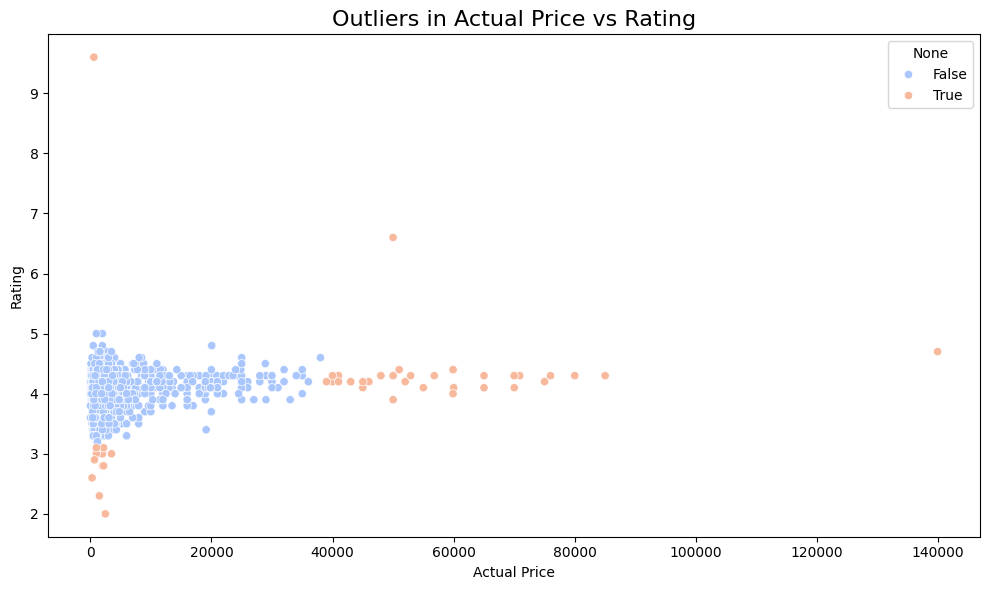

In [20]:
# Scatter plot to visualize outliers in Actual Price vs Rating
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['actual_price'], y=df['rating'], hue=outliers.any(axis=1), palette='coolwarm')
plt.title("Outliers in Actual Price vs Rating", fontsize=16)
plt.xlabel("Actual Price")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()


### Step 5: Handle Outliers
- If the outliers are important and reflect actual product behavior, we may choose to keep them.

- If the outliers are caused by errors in data collection, we should either remove them or replace them with suitable values.

In [21]:

# Load the data
df = pd.read_csv(r"C:\Users\Basmala\OneDrive\Desktop\Amason\Data\cleaned_data.csv")

# Define the numeric columns
numeric_columns = ['actual_price', 'discount_percentage', 'rating', 'rating_count']

# Calculate mean and std for each numeric column
mean = df[numeric_columns].mean()
std = df[numeric_columns].std()

# Calculate Z-scores
z_scores = (df[numeric_columns] - mean) / std

# Detect rows where any z-score > 3 or < -3
outliers = (z_scores > 3) | (z_scores < -3)

# Remove outliers
df_cleaned = df[~outliers.any(axis=1)]

# Show the cleaned dataset
df_cleaned.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",Manav,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",ArdKn,"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",Kunal,"R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",Omkar dhale,"R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",rahuls6099,"R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [22]:
# Save the cleaned dataset to a new CSV
df_cleaned.to_csv(r"C:\Users\Basmala\OneDrive\Desktop\Amason\Data\cleaned_data_no_outliers.csv", index=False)

In [23]:

df_no_outliers = df[~outliers.any(axis=1)]

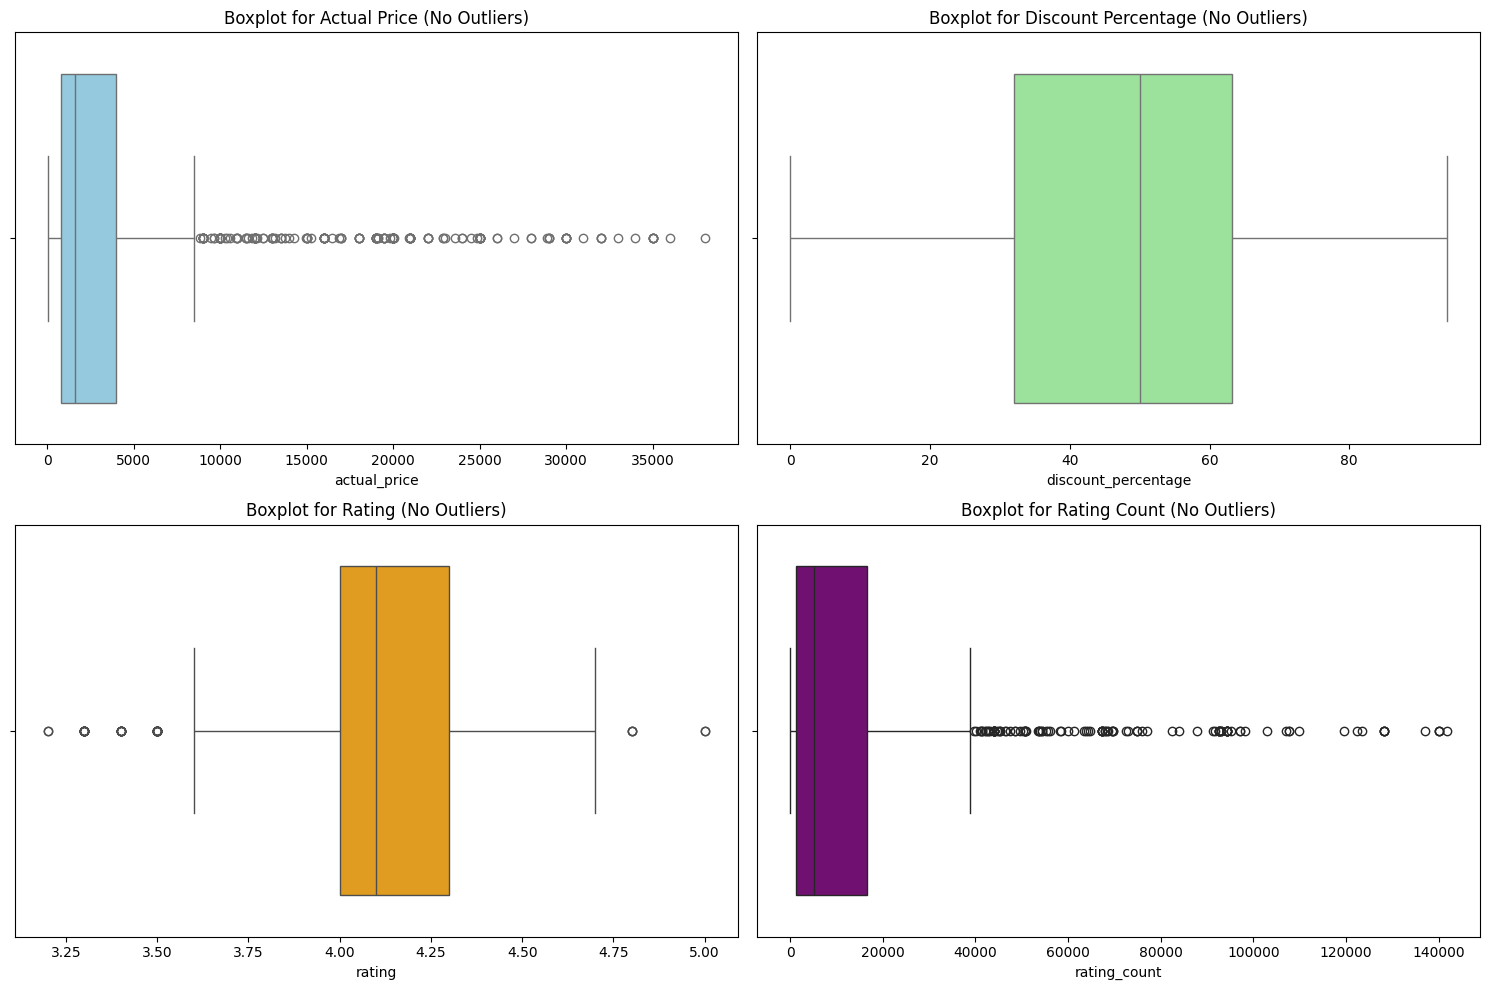

In [24]:
# Boxplot after removing ouliers
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
sns.boxplot(x=df_no_outliers['actual_price'], color='skyblue')
plt.title('Boxplot for Actual Price (No Outliers)')

plt.subplot(2, 2, 2)
sns.boxplot(x=df_no_outliers['discount_percentage'], color='lightgreen')
plt.title('Boxplot for Discount Percentage (No Outliers)')


plt.subplot(2, 2, 3)
sns.boxplot(x=df_no_outliers['rating'], color='orange')
plt.title('Boxplot for Rating (No Outliers)')

plt.subplot(2, 2, 4)
sns.boxplot(x=df_no_outliers['rating_count'], color='purple')
plt.title('Boxplot for Rating Count (No Outliers)')

plt.tight_layout()
plt.show()